In [9]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline


In [10]:
from fastai.imports import *
from fastai.transforms import *
from fastai.model import *
from fastai.sgdr import *
from fastai.conv_learner import *
from fastai.plots import *
from fastai.dataset import *

In [11]:
PATH = 'data/invasivespecies/'
labels_csv = f'{PATH}train_labels.csv'
arch = resnext50

In [12]:
n = len(list(open(labels_csv))) - 1
val_idx = get_cv_idxs(n)

In [5]:
def get_data(sz,bs):
    tfms = tfms_from_model(arch,sz,aug_tfms=transforms_side_on)
    data = ImageClassifierData.from_csv(PATH,'train',labels_csv,bs=bs,tfms=tfms,val_idxs=val_idx,suffix='.jpg',test_name='test')
    return data

In [6]:
sz = 96
bs = 48
data = get_data(sz,bs)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [7]:
lrf = learn.lr_find()

  3%|▎         | 1/39 [00:00<00:26,  1.44it/s, loss=1.07]


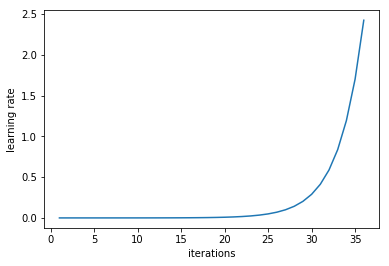

In [8]:
learn.sched.plot_lr()

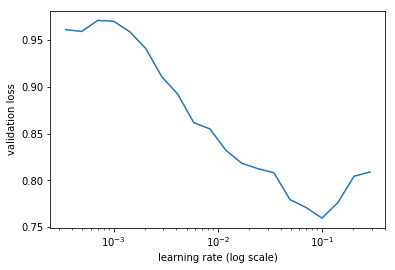

In [9]:
learn.sched.plot()

In [10]:
lr = 0.01
learn.fit(lr,3)

epoch      trn_loss   val_loss   accuracy                  
    0      0.443932   0.317423   0.862745  
    1      0.339448   0.301175   0.884532                  
    2      0.279135   0.306736   0.877996                  



[array([0.30674]), 0.8779956464673958]

In [11]:
learn.precompute=False

In [12]:
lr = 0.01
learn.fit(lr,4)

epoch      trn_loss   val_loss   accuracy                  
    0      0.302631   0.307032   0.875817  
    1      0.288357   0.291291   0.893246                  
    2      0.279062   0.272389   0.869281                  
    3      0.266519   0.260174   0.891068                  



[array([0.26017]), 0.8910675302050473]

In [13]:
torch.cuda.empty_cache()

In [14]:
learn.unfreeze()
lrs = np.array([lr/9,lr/5,lr])

In [15]:
learn.fit(lrs,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                  
    0      0.36504    0.234603   0.891068  
    1      0.235911   0.16649    0.925926                  
    2      0.172038   0.175232   0.938998                  
    3      0.138692   0.148447   0.943355                  
    4      0.109035   0.156084   0.945534                  
    5      0.075618   0.14546    0.954248                   
    6      0.0608     0.145526   0.956427                   



[array([0.14553]), 0.9564270186268427]

In [16]:
sz = 224
bs = 48
data = get_data(sz,bs)


In [17]:
learn.freeze()

In [18]:
lrf = learn.lr_find()

 97%|█████████▋| 38/39 [00:08<00:00,  4.25it/s, loss=0.0397]


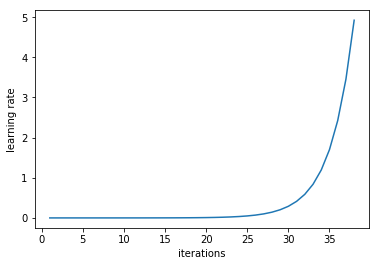

In [19]:
learn.sched.plot_lr()

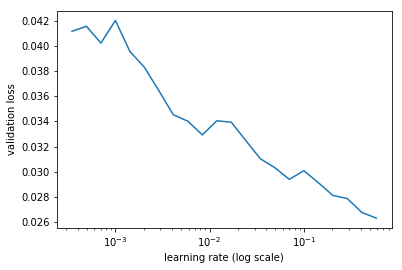

In [20]:
learn.sched.plot()

In [21]:
lr = 0.02
learn.fit(lr,4)

epoch      trn_loss   val_loss   accuracy                   
    0      0.027      0.156478   0.958606  
    1      0.02641    0.178983   0.954248                   
    2      0.030883   0.194581   0.958606                   
    3      0.032699   0.189924   0.954248                   



[array([0.18992]), 0.9542483590007608]

In [22]:
torch.cuda.empty_cache()

In [23]:
learn.unfreeze()

In [24]:
lr = 0.02
learn.fit(lr,3,cycle_len=1,cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      0.314838   0.204486   0.921569  
    1      0.245904   0.118987   0.95207                   
    2      0.158581   0.087384   0.962963                  
    3      0.154116   0.150047   0.947712                  
    4      0.138267   0.136627   0.949891                  
    5      0.112696   0.080412   0.973856                  
    6      0.08091    0.080244   0.969499                   



[array([0.08024]), 0.9694989202848447]

In [ ]:
torch.cuda.empty_cache()

In [ ]:
log_preds, y = learn.TTA(is_test=True) # use test dataset rather than validation dataset
probs = np.mean(np.exp(log_preds),0)

In [ ]:
df = pd.DataFrame(probs[:,1],columns=['invasive'])
df.insert(0, 'name', [o[5:-4] for o in data.test_ds.fnames])


In [ ]:
SUBM = f'{PATH}subm/'
os.makedirs(SUBM, exist_ok=True)
df.to_csv(f'{SUBM}subm.gz', compression='gzip', index=False)

In [ ]:
FileLink(f'{SUBM}subm.gz')